In [1]:
import os

from tqdm import tqdm
from glob import glob

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
META_IMAGES = "../../data/meta/images"
PLOT_DIR = "../../plots"
os.makedirs(PLOT_DIR, exist_ok=True)

images = sorted(glob(os.path.join(META_IMAGES, '*.csv')))

In [3]:
def merge_dfs(paths):
    mrg = [pd.read_csv(pth) for pth in tqdm(paths)]
    df = pd.concat(mrg)
    return df

In [4]:
df = merge_dfs(images)

100%|██████████| 60774/60774 [05:10<00:00, 195.69it/s]


In [5]:
df = df.round({'scale': 2})

In [6]:
df

,px_height,px_width,x0,y0,x1,y1,m_height,m_width,scale
0,18562,16285,504062.75,714169.50,508134.00,718810.00,4640.50,4071.25,0.25
0,18561,16302,504066.75,709535.00,508142.25,714175.25,4640.25,4075.50,0.25
0,18547,16301,500000.00,704898.50,504075.25,709535.25,4636.75,4075.25,0.25
0,18561,16318,504071.00,704900.25,508150.50,709540.50,4640.25,4079.50,0.25
0,18547,16252,500000.00,718802.50,504063.00,723439.25,4636.75,4063.00,0.25
...,...,...,...,...,...,...,...,...,...
0,48971,44142,195362.00,666030.50,197569.10,668479.05,2448.55,2207.10,0.05
0,48953,44123,197419.00,665897.65,199625.15,668345.30,2447.65,2206.15,0.05
0,48976,44162,195210.95,663715.55,197419.05,666164.35,2448.80,2208.10,0.05
0,48958,44143,197269.00,663582.65,199476.15,666030.55,2447.90,2207.15,0.05


In [7]:
sorted(df.scale.unique())

[0.03, 0.05, 0.07, 0.08, 0.1, 0.25, 0.5, 0.66, 0.7, 0.75]

In [8]:
new_df = pd.DataFrame(columns=["scale", "counter"])
new_df.scale = sorted(df.scale.unique()) 

new_df.counter = new_df.apply(lambda x: df[df.scale == x.scale].count(), axis=1)
new_df

,scale,counter
0,0.03,57
1,0.05,3883
2,0.07,1875
3,0.08,4271
4,0.10,1790
5,0.25,48215
6,0.50,3
7,0.66,484
8,0.70,105
9,0.75,91


In [9]:
df_area = pd.DataFrame(columns=["scale", "area"])
df_area.scale = sorted(df.scale.unique()) 

df_area.area = df_area.apply(lambda x: (df[df.scale==x.scale].m_width*df[df.scale==x.scale].m_height).sum(), axis=1)
df_area

,scale,area
0,0.03,7.272418e+07
1,0.05,1.570269e+10
2,0.07,2.554264e+09
3,0.08,5.801922e+09
4,0.10,2.321495e+10
5,0.25,2.523245e+11
6,0.50,1.554659e+07
7,0.66,1.003217e+10
8,0.70,2.201192e+09
9,0.75,2.341448e+09


In [10]:
df_area.area = df_area.area*1e-6
df_area

,scale,area
0,0.03,72.724180
1,0.05,15702.689178
2,0.07,2554.264443
3,0.08,5801.922240
4,0.10,23214.949921
5,0.25,252324.498893
6,0.50,15.546586
7,0.66,10032.172642
8,0.70,2201.191897
9,0.75,2341.447646


In [11]:
df_area.area.sum() # PL area from wiki - 312696

314261.40762803896

### number of images in each scale

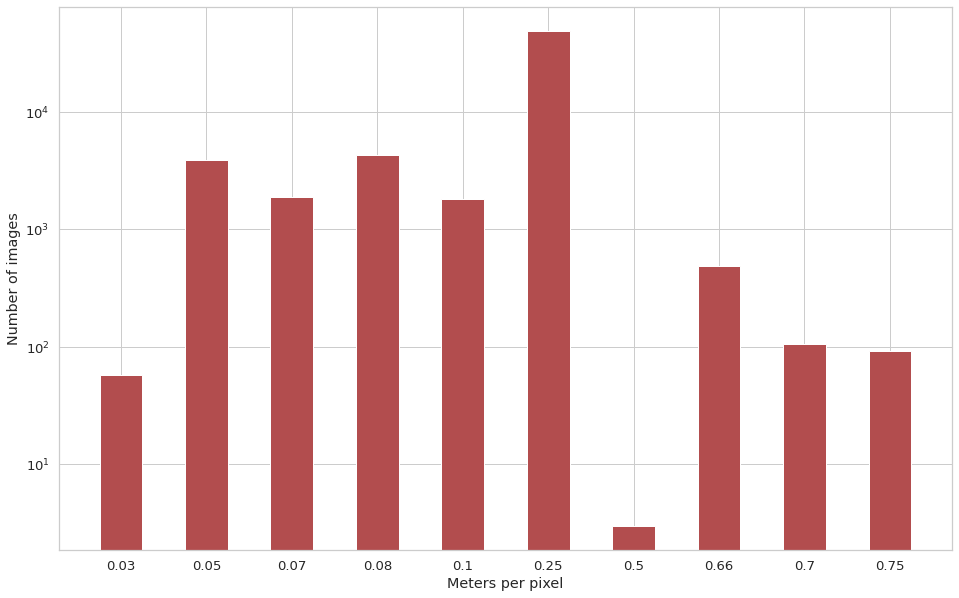

In [14]:
plt.figure(figsize=(16, 10))
sns.set(style = 'whitegrid', font_scale = 1.2)
sns.set_palette(sns.color_palette("Set1", desat=.5))
plt.tight_layout()

width = 0.5
num = np.arange(len(new_df.scale))

p1 = plt.bar(num, new_df.counter, width)
plt.xticks(num, new_df.scale)

plt.xlabel('Meters per pixel')
plt.ylabel('Number of images')
plt.yscale('log')
plt.savefig(os.path.join(PLOT_DIR, 'scale_img-number.eps'), bbox_inches='tight')

### area per scale

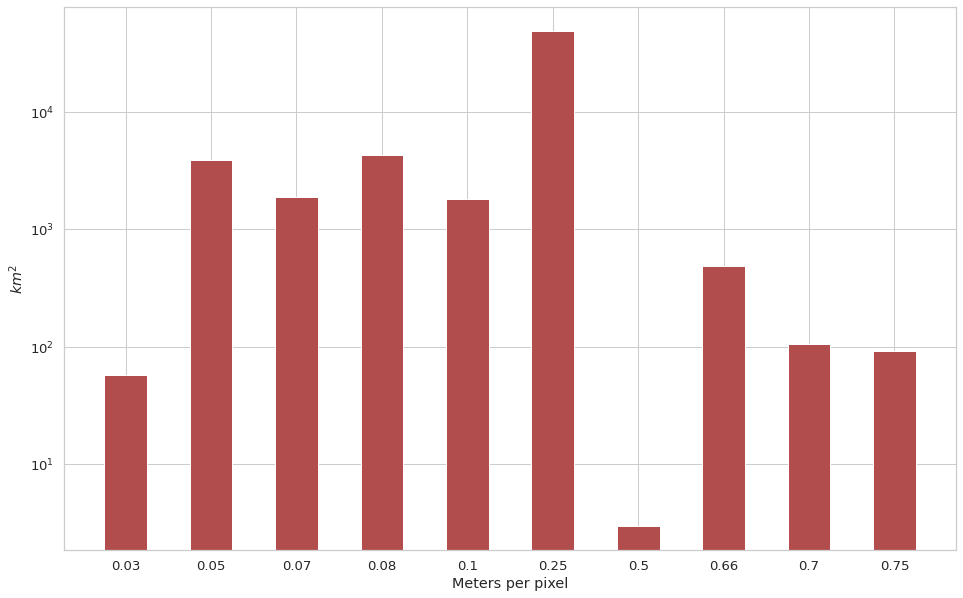

In [15]:
plt.figure(figsize=(16, 10))
sns.set(style = 'whitegrid', font_scale = 1.2)
sns.set_palette(sns.color_palette("Set1", desat=.5))
plt.tight_layout()

width = 0.5
num = np.arange(len(new_df.scale))

p1 = plt.bar(num, new_df.counter, width)
plt.xticks(num, new_df.scale)

plt.xlabel('Meters per pixel')
plt.ylabel('$km^2$')
plt.yscale('log')
plt.savefig(os.path.join(PLOT_DIR, 'scale_km2.eps'), bbox_inches='tight')